Метод ближайщих соседей - один из самых интуитивно понятных но в тоже время эффективных методов класссификации.

Общая идея метода.

1. Предварительное обучение не требуется. Прогноз делается на основе известных данных.
2. Для тестового вектора признаков $\overline{x_{0}}$ находим ближайшие $k$ в пространстве признаков с помощью заданной метрики.
3. Классифицируем $\overline{x_{0}}$  по большинству меток представителей множества $k$ соседей из п 2.

Подробнее [тут](https://habr.com/ru/articles/149693/)


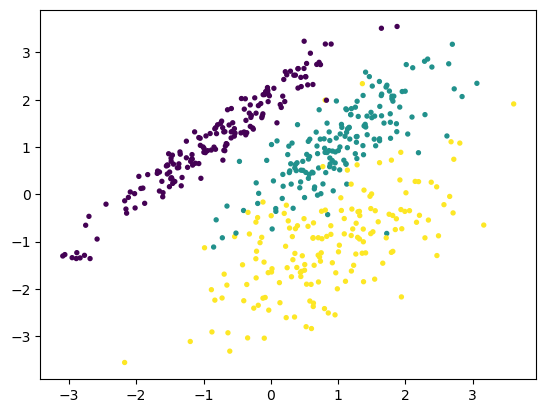

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=500, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *KNeighborsClassifier*.
4. Сравните работу полученных моеделей.
5. Изучите и эмпирически протестируйте гиперпараметры моделей для вашей и встроенной функции.
6. Можно ли переобучить классификатор k-ближайших соседей? Эмпирически подтвердите!

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

class CustomKNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbors_classes = self.y_train[neighbors_indices]
            most_common_class = np.bincount(neighbors_classes).argmax()
            predictions.append(most_common_class)
        return np.array(predictions)


In [ ]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

custom_knn = CustomKNNClassifier(n_neighbors=3)
custom_knn.fit(X_train, y_train)
custom_predictions = custom_knn.predict(X_test)
custom_accuracy = accuracy_score(y_test, custom_predictions)

In [ ]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"Accuracy of custom KNN: {custom_accuracy:.2f}")
print(f"Accuracy of sklearn KNN: {sklearn_accuracy:.2f}")



Accuracy of custom KNN: 0.87
Accuracy of sklearn KNN: 0.87


In [ ]:
neighbors = list(range(1, 21))
custom_accuracies = []
sklearn_accuracies = []

for n in neighbors:
    custom_knn = CustomKNNClassifier(n_neighbors=n)
    custom_knn.fit(X_train, y_train)
    custom_predictions = custom_knn.predict(X_test)
    custom_accuracies.append(accuracy_score(y_test, custom_predictions))

    sklearn_knn = KNeighborsClassifier(n_neighbors=n)
    sklearn_knn.fit(X_train, y_train)
    sklearn_predictions = sklearn_knn.predict(X_test)
    sklearn_accuracies.append(accuracy_score(y_test, sklearn_predictions))


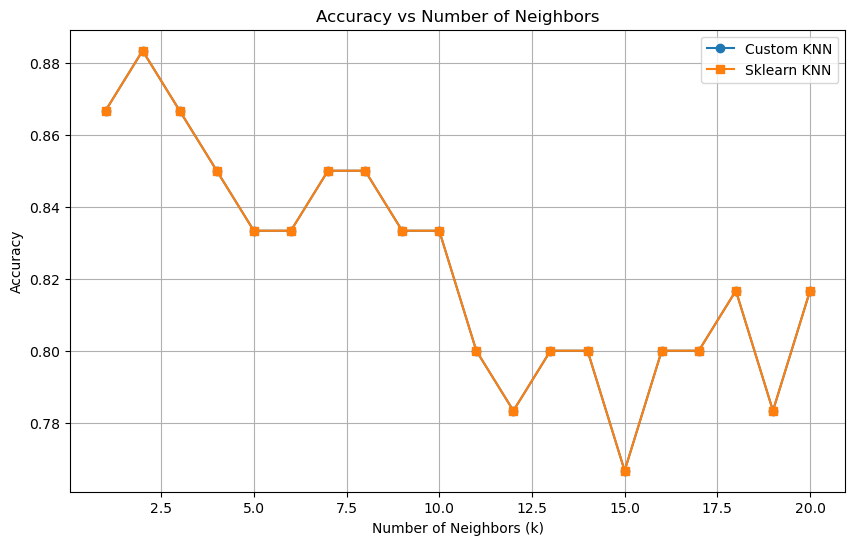

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, custom_accuracies, label='Custom KNN', marker='o')
plt.plot(neighbors, sklearn_accuracies, label='Sklearn KNN', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

In [ ]:
n_neighbors_overfit = len(X_train)
custom_knn_overfit = CustomKNNClassifier(n_neighbors=n_neighbors_overfit)
custom_knn_overfit.fit(X_train, y_train)
custom_predictions_overfit = custom_knn_overfit.predict(X_test)
overfit_accuracy = accuracy_score(y_test, custom_predictions_overfit)

print(f"Accuracy with overfitting (k = {n_neighbors_overfit}): {overfit_accuracy:.2f}")

Accuracy with overfitting (k = 140): 0.47


## <font color = 'green'> 2. Элементарная работа с изображениями  </font>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

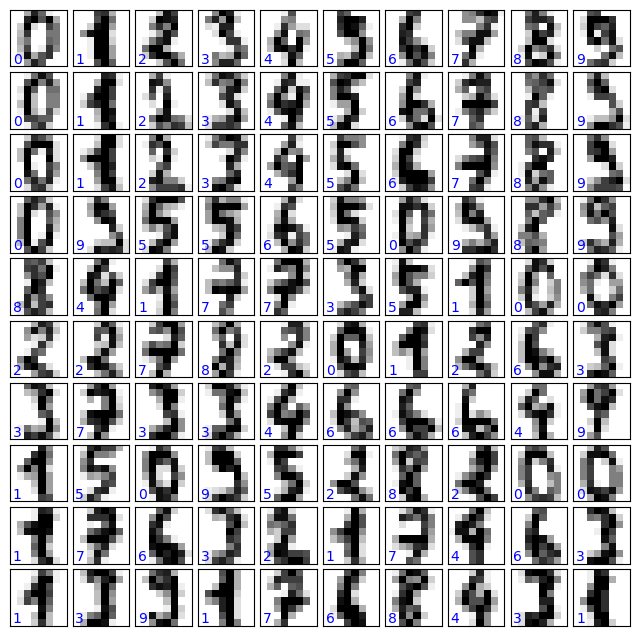

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [ ]:
X = digits.data
X.shape

(1797, 64)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать изображения как векторы числовых признаков?
2. Реализуйте классификатор для определения цифры на изображении используя различные модели, изученные в ЛР4-ЛР6.
3. Тщательно оцените качество полученных моделей и сделайте выводы.

1. Да, можно. Каждое изображение в наборе данных представляет собой матрицу размером 8×8, где каждый элемент соответствует интенсивности серого цвета для конкретного пикселя. В матрице 8×8 всего 64 элемента, и мы можем преобразовать эту матрицу в одномерный вектор длиной 64, который будет использоваться как набор числовых признаков

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}:\n")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.94      0.89      0.92        55
           2       1.00      1.00      1.00        53
           3       0.98      0.98      0.98        55
           4       0.95      0.98      0.96        54
           5       0.96      0.96      0.96        55
           6       0.98      0.98      0.98        54
           7       0.96      0.98      0.97        54
           8       0.80      0.87      0.83        52
           9       0.96      0.91      0.93        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540

Confusion Matrix:
 [[53  0  0  0  1  0  0  0  0  0]
 [ 0 49  0  1  1  0  0  0  4  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  1  0]
 [ 0  0  0  0 53  0  0  0  1  0]
 [ 0  0  0  0  0 53  0  0  0  2]
 [

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


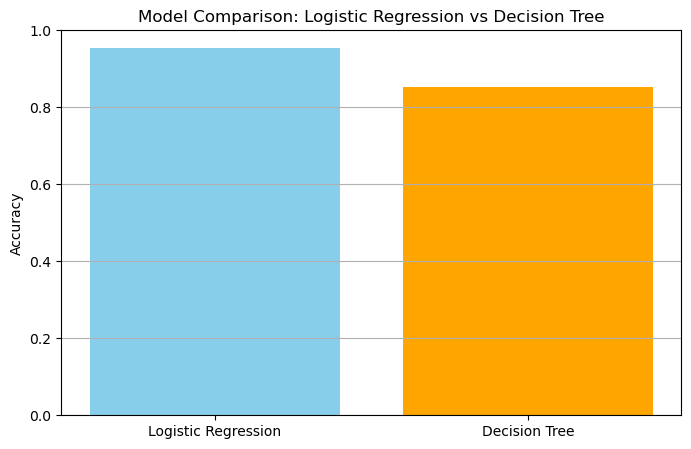

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Logistic Regression vs Decision Tree')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [ ]:
best_model_name = max(results, key=results.get)
print(f"Лучшей моделью является {best_model_name} с точностью {results[best_model_name]:.2f}.")

Лучшей моделью является Logistic Regression с точностью 0.95.


## <font color = 'green'> 3. Работа с текстом.  </font>

Текстовые признаки также можно сводить к числовым. Для этого существует ряд подходов, которые изучаются подробно в отдельном разделе науки о данных. В прошлых ЛР вы уже изучили один из них TF-IDF -векторизацию.

Подробнее [тут](https://yandex.ru/q/datascience/8268666625/).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 ,
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

test = X.toarray()
test

array([[0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
        0.        , 0.        , 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.35829137, 0.        ],
       [0.40619178, 0.31544415, 0.        , 0.        , 0.53409337,
        0.53409337, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40619178, 0.        ],
       [0.32412354, 0.25171084, 0.        , 0.        , 0.        ,
        0.        , 0.4261835 , 0.        , 0.4261835 , 0.4261835 ,
        0.32412354, 0.        , 0.4261835 ]])

In [ ]:
vectorizer.vocabulary_

{'it': 3,
 'is': 2,
 'going': 1,
 'to': 10,
 'rain': 7,
 'today': 11,
 'am': 0,
 'not': 4,
 'outside': 5,
 'watch': 12,
 'the': 9,
 'season': 8,
 'premiere': 6}

<font color = 'red' size = 5>Задание 3 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать тексты как векторы числовых признаков?
2. Реализуйте классификатор (на основе любой изученной вами модели) для определения эмоционального оттенка отзывов к фильмам.
   Для преобразования текста используйте векторизацию TF-IDF. Предварительно минимально обработайте текст (стоп-слова, леммантизатор, посторонние символы)
3. Попытайтесь найти оптимальную модель прогноза на основе KNN метода. Как влияет количество признаков на работоспособность модели?
4. Попытайтесь оптимизировать количество фич в тексте используя другой векторизатор.*

**Учитывайте, что векторизатор значительно увеличивает количество фич! Будьте внимательны со скоростью и производительностью!**

[Датасет](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

Да, тексты можно преобразовать в числовые векторы, используя, например, векторизацию TF-IDF.
После векторизации каждое слово становится отдельным признаком, числовое значение которого отражает частотность и важность слова
в документе.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egorh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egorh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('C:/users/egorh/Downloads/IMDB Dataset.csv')

df['review'] = df['review'].apply(preprocess_text)
labels = df['sentiment'].map({'positive': 1, 'negative': 0}).values

In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['review']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

In [ ]:
param_grid = {'n_neighbors': range(1, 11)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [ ]:
best_knn = grid_search.best_estimator_
print("Лучшие параметры KNN:", grid_search.best_params_)

Лучшие параметры KNN: {'n_neighbors': 9}


In [ ]:
y_pred = best_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6733333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.67      7411
           1       0.67      0.68      0.68      7589

    accuracy                           0.67     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.67      0.67      0.67     15000

Confusion Matrix:
 [[4912 2499]
 [2401 5188]]


In [ ]:
features_range = [60, 70, 80, 90, 100]
accuracies = []
for max_features in features_range:
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(df['review']).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

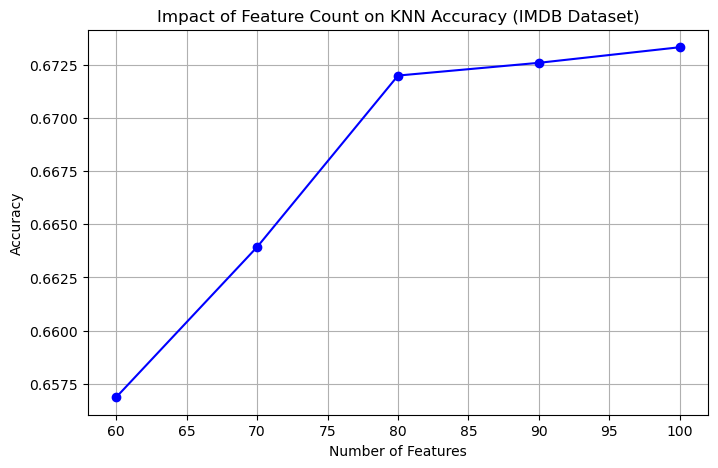

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(features_range, accuracies, marker='o', color='blue')
plt.title('Impact of Feature Count on KNN Accuracy (IMDB Dataset)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
count_vectorizer = CountVectorizer(max_features=10)
X_count = count_vectorizer.fit_transform(df['review']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_count, labels, test_size=0.3, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy with CountVectorizer:", accuracy_score(y_test, y_pred))

Accuracy with CountVectorizer: 0.5421333333333334
